In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%%bash

ls /data/TCRP_performances/BMS-754807

PDTC


In [55]:
datapath = Path("/data/merged_performances/baseline_performances/")

In [56]:
%%time

results = {}
for outer_directory in datapath.glob("*"): 
    drug = outer_directory.stem
    results[drug] = {}
    
    for inner_directory in outer_directory.glob("*"): 
        tissue = inner_directory.stem
        results[drug][tissue] = {}
        
        data = np.load(inner_directory / "baseline_performance.npz")
        
        for model in ['linear', 'KNN', 'RF']: 
            zero = data[f"{model}-zero"]
            zero = np.vstack([zero for _ in range(10)]) # There is only 1 possible zero-shot, so expanding for all trials
            performance = np.mean(np.hstack([zero, data[f"{model}-fewshot"]]), axis=0)
            
            results[drug][tissue][model] = performance    

CPU times: user 38.9 ms, sys: 0 ns, total: 38.9 ms
Wall time: 38.1 ms


In [57]:
results

{'AZD7762': {'PDTC': {'linear': array([0.31920249, 0.71921905, 0.54295101, 0.56758336, 0.62212457,
          0.70669367, 0.69007153, 0.68602305, 0.57533397, 0.5425731 ,
          0.52259022]),
   'KNN': array([-0.35491894, -0.44775385,  0.06486637,         nan,         nan,
                  nan,         nan,         nan,  0.3631558 ,  0.3030109 ,
           0.41867993]),
   'RF': array([0.23832205, 0.37841836, 0.27819375, 0.11907993, 0.20801885,
          0.13695599, 0.08424371, 0.24425527, 0.09547222, 0.19079019,
          0.10079631])}},
 'BMS-345541': {'PDTC': {'linear': array([-0.05008361,  0.00555501, -0.00208306,  0.02346458,  0.0651909 ,
           0.09153316,  0.1059938 ,  0.08227614,  0.07026818,  0.06236006,
           0.07440813]),
   'KNN': array([-0.04329108,  0.13202567,  0.20238499,  0.17797836,  0.1765813 ,
                  nan, -0.06937052, -0.10713686, -0.00672588,  0.21006684,
           0.32297131]),
   'RF': array([ 0.02744794,  0.13350508, -0.05489285,  0.087083

In [58]:
datapath = Path("/data/merged_performances/TCRP_performances/")

In [59]:
zero

array([[0.13392147],
       [0.13392147],
       [0.13392147],
       [0.13392147],
       [0.13392147],
       [0.13392147],
       [0.13392147],
       [0.13392147],
       [0.13392147],
       [0.13392147]])

In [60]:
%%time

for outer_directory in datapath.glob("*"): 
    drug = outer_directory.stem
    for inner_directory in outer_directory.glob("*"): 
        tissue = inner_directory.stem
        
        data = np.load(inner_directory / "TCRP_performance.npz")
        
        for model in ['TCRP']: 
            zero = data[f"{model}-zero"]
            new_data = data["TCRP-fewshot"] 
            fewshot = np.vstack([new_data for _ in range(10)])
            zero = np.vstack([zero for _ in range(10)]) # There is only 1 possible zero-shot, so expanding for all trials
            performance = np.mean(np.hstack([zero, fewshot]), axis=0)
            
            results[drug][tissue][model] = performance    

CPU times: user 69.2 ms, sys: 0 ns, total: 69.2 ms
Wall time: 68.1 ms


In [61]:
results

{'AZD7762': {'PDTC': {'linear': array([0.31920249, 0.71921905, 0.54295101, 0.56758336, 0.62212457,
          0.70669367, 0.69007153, 0.68602305, 0.57533397, 0.5425731 ,
          0.52259022]),
   'KNN': array([-0.35491894, -0.44775385,  0.06486637,         nan,         nan,
                  nan,         nan,         nan,  0.3631558 ,  0.3030109 ,
           0.41867993]),
   'RF': array([0.23832205, 0.37841836, 0.27819375, 0.11907993, 0.20801885,
          0.13695599, 0.08424371, 0.24425527, 0.09547222, 0.19079019,
          0.10079631]),
   'TCRP': array([ 0.61858451,  0.16936714, -0.2267184 , -0.02118262, -0.18959509,
           0.08292695,  0.11546987,  0.12348725, -0.00427062,  0.00508382,
           0.        ])}},
 'BMS-345541': {'PDTC': {'linear': array([-0.05008361,  0.00555501, -0.00208306,  0.02346458,  0.0651909 ,
           0.09153316,  0.1059938 ,  0.08227614,  0.07026818,  0.06236006,
           0.07440813]),
   'KNN': array([-0.04329108,  0.13202567,  0.20238499,  0.1779

## Collapsing across all results

In [62]:
TCRP_results = {'TCRP': []}

for drug, d in results.items(): 
    for tissue, d in d.items(): 
        for model, p in d.items(): 
            if model == "TCRP":
                p = np.nan_to_num(p)
                TCRP_results[model].append(p)

for model, ps in TCRP_results.items(): 
    TCRP_results[model] = np.vstack(ps)

In [63]:
TCRP_results

{'TCRP': array([[ 0.61858451,  0.16936714, -0.2267184 , -0.02118262, -0.18959509,
          0.08292695,  0.11546987,  0.12348725, -0.00427062,  0.00508382,
          0.        ],
        [ 0.06606282, -0.24937095, -0.28799832, -0.23123537, -0.25044187,
         -0.23268992, -0.23152041, -0.22603293, -0.26778555, -0.27536347,
          0.        ],
        [-0.46475405, -0.01883381, -0.06129472, -0.09348761, -0.11633393,
         -0.12457124, -0.1117682 , -0.12338211, -0.14389558, -0.11398892,
          0.        ],
        [ 0.21156129,  0.07029902,  0.02153648,  0.03749916,  0.03862091,
          0.08893061,  0.13267747,  0.06352775,  0.0772083 ,  0.02283824,
          0.        ],
        [ 0.111385  ,  0.14847058,  0.10880134,  0.14742198,  0.21602297,
          0.20267519,  0.19867969,  0.20367417,  0.18766911,  0.20344365,
          0.        ],
        [ 0.38006288,  0.24408367,  0.15121058,  0.15922713,  0.1386683 ,
          0.14932149,  0.14403137,  0.14225979,  0.15926455,  0

In [148]:
results_by_baseline = {'linear': [], 'KNN': [], 'RF': [],"TCRP":[]}

for drug, d in results.items(): 
    for tissue, d in d.items(): 
        for model, p in d.items(): 
            p = np.nan_to_num(p)
            results_by_baseline[model].append(p)
            
for model, ps in results_by_baseline.items(): 
    results_by_baseline[model] = np.vstack(ps)

In [65]:
for model, ps in results_by_baseline.items(): 
    print(np.mean(ps, axis=0))

[0.08828476 0.10529671 0.12339317 0.11956651 0.12633516 0.11215672
 0.12671228 0.12970989 0.11441861 0.1158532  0.1186433 ]
[0.0741105  0.01441402 0.08704183 0.04970095 0.07451531 0.
 0.03658432 0.0523958  0.09055725 0.12307077 0.16207992]
[0.04197681 0.05356834 0.0415911  0.00285453 0.06350256 0.05122069
 0.04113151 0.04576161 0.0861521  0.08114793 0.06531878]
[ 0.0551235   0.00514466 -0.00552337  0.02685952  0.01504248  0.04974809
  0.0503667   0.04661081  0.02801055  0.03020702  0.        ]


[Text(0, 0, 'Pretrained'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10')]

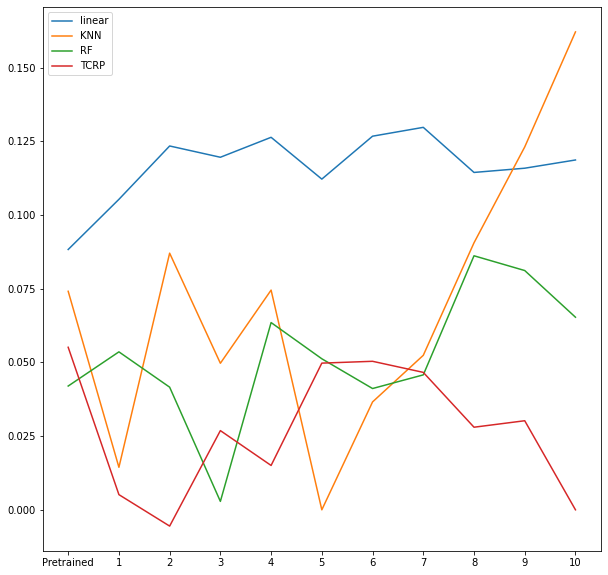

In [69]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
for model, ps in results_by_baseline.items(): 
    ax.plot(np.arange(11), np.mean(ps, axis=0), label=model)

ax.legend()
labels = ['Pretrained'] + [str(i) for i in range(1, 11)]
ax.set_xticks(np.arange(11))
ax.set_xticklabels(labels)

In [73]:
np.mean(results["AZD7762"]["PDTC"]["TCRP"])

0.06119571041993119

In [86]:
print(results.keys())

dict_keys(['AZD7762', 'BMS-345541', 'BMS-536924', 'BMS-754807', 'CHIR-99021', 'Embelin', 'Gefitinib', 'KU-55933', 'Obatoclax_Mesylate', 'TW_37', 'Bosutinib', 'Camptothecin', 'MK-2206', 'RO-3306', 'GSK269962A', 'JQ1'])


In [136]:
from collections import OrderedDict


In [159]:
TCRP_drug ={}
linear_drug = {}
RF_drug = {}
KNN_drug = {}
for key,value in results.items():
    if False in np.isnan(results[key]["PDTC"]["KNN"]):
        p = np.nan_to_num(results[key]["PDTC"]["KNN"])
    TCRP_drug[key] = np.mean(results[key]["PDTC"]["TCRP"])
    linear_drug[key] = np.mean(results[key]["PDTC"]["linear"])
    RF_drug[key] = np.mean(results[key]["PDTC"]["RF"])
    KNN_drug[key]= np.mean(p)
TCRP_drug = {k: v for k, v in sorted(TCRP_drug.items(), key=lambda item: item[1])}   
linear_drug = dict(OrderedDict((k, linear_drug[k]) for k in list(TCRP_drug.keys())))
RF_drug = dict(OrderedDict((k, RF_drug[k]) for k in list(TCRP_drug.keys())))
KNN_drug = dict(OrderedDict((k, KNN_drug[k]) for k in list(TCRP_drug.keys())))

In [160]:
def prepare_points(model_dict):
    items = model_dict.items()
    myList = (items) 
    x, y = zip(*myList) 
    return x,y

In [161]:
TCRP_x,TCRP_y = prepare_points(TCRP_drug)
linear_x,linear_y = prepare_points(linear_drug)
RF_x,RF_y = prepare_points(RF_drug)
KNN_x,KNN_y = prepare_points(KNN_drug)

In [166]:
TCRP_x

('Bosutinib',
 'Camptothecin',
 'BMS-345541',
 'JQ1',
 'BMS-536924',
 'GSK269962A',
 'AZD7762',
 'RO-3306',
 'BMS-754807',
 'Gefitinib',
 'CHIR-99021',
 'Embelin',
 'Obatoclax_Mesylate',
 'KU-55933',
 'TW_37')

In [ ]:
R

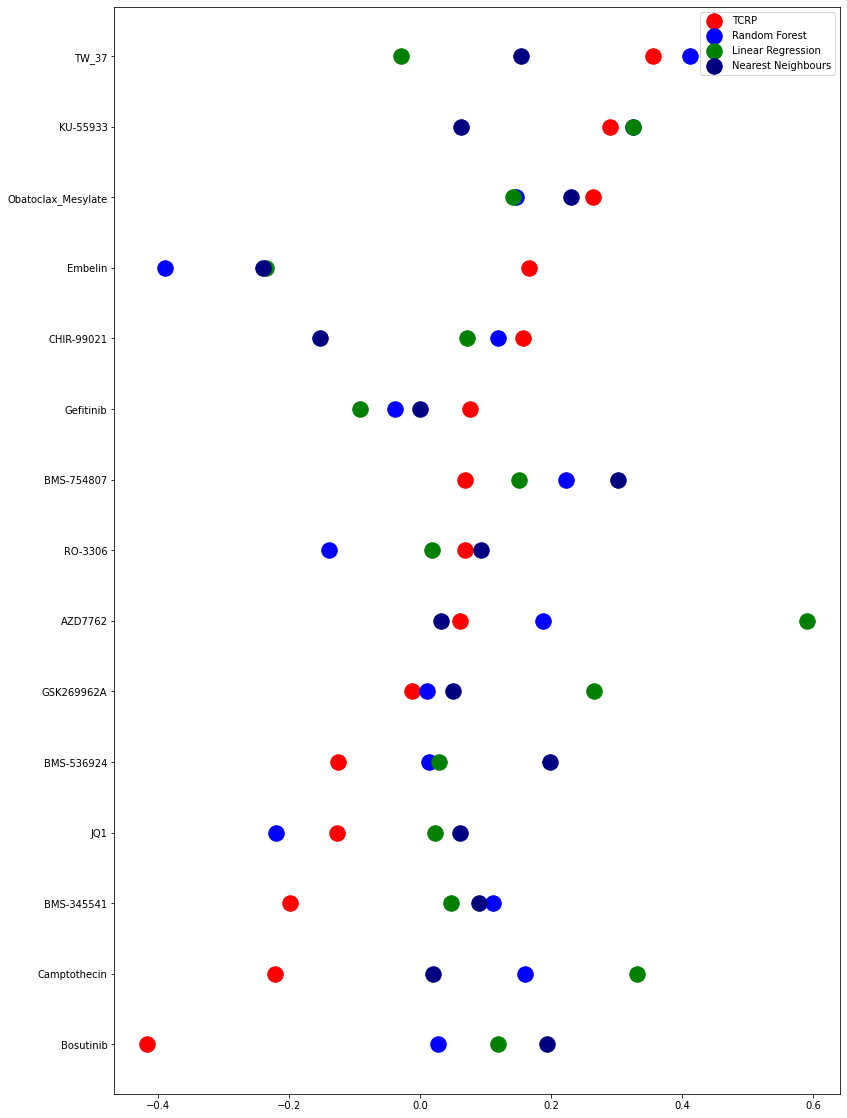

In [198]:
fig = plt.figure()
fig.set_size_inches(13,20)
TCRP = plt.scatter(TCRP_y,TCRP_x,color="red",s=240)
TCRP.set_label("TCRP")
RF = plt.scatter(RF_y,RF_x,color="blue",s=240)
RF.set_label("Random Forest")
linear = plt.scatter(linear_y,linear_x,color="green",s=240)
linear.set_label("Linear Regression")
KNN = plt.scatter(KNN_y,KNN_x,color="navy",s=240)
KNN.set_label("Nearest Neighbours")
plt.legend()